# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: *Mukhomorova Olga*</center>

#### <hr /> General Information

**Due Date:** 28.01.2015 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:leonid.e.zhukov@gmail.com> and <mailto:shestakoffandrey@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

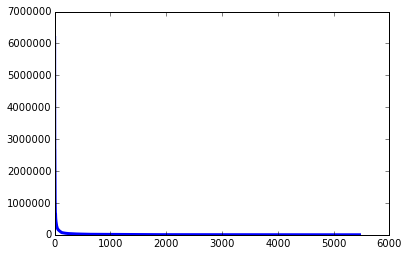

alpha = 1.76872234173
standard deviation (squared) = 18662381650.7
min = 800
max = 6187267
mean = 15687.0838214
median = 2566.5


In [1]:
import urllib2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#reading data
filename = urllib2.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt')
data = pd.read_table(filename, sep=' ', header=None)
#creating pandas dataframe
data.columns=['count','word']
#grouping similar words
data_g=data.groupby(['word']).sum().reset_index()
#checking that Zipf's Law holds by plotting data distribution
plt.plot(data_g.sort(['count'], ascending=0)['count'], linewidth=3.0)
plt.show()
alpha=1+len(data_g['count'])/(sum(np.log(np.array(data_g['count'])/min(np.array(data_g['count'])))))
print 'alpha = '+str(alpha)
print 'standard deviation (squared) = '+str((np.std(np.array(data_g['count'])))**2)
print 'min = '+str(min(np.array(data_g['count'])))
print 'max = '+str(max(np.array(data_g['count'])))
print 'mean = '+str(np.mean(np.array(data_g['count'])))
print 'median = '+str(np.median(np.array(data_g['count'])))

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)


1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test

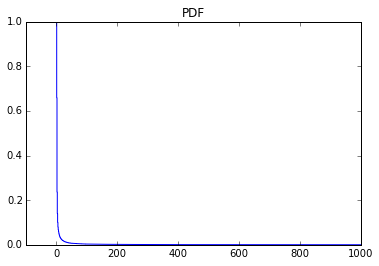

In [64]:
#*****************************Routing network*****************************
import networkx as nx
#loading data
filename = urllib2.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/network.txt')
G=nx.read_edgelist('network.txt')

#degrees of G's nodes
k = G.degree()
#sorting degrees of nodes in descending order
import operator
k_sorted=sorted(k.items(), key = operator.itemgetter(1), reverse=True)
a=[]#degrees
b=[]#node's ids
for i in range(len(k_sorted)):
    a.append(k_sorted[i][1])
    b.append(int(k_sorted[i][0]))
p = 1. * np.arange(len(a)) / (len(a) - 1)
plt.plot(sorted(a, reverse=True),p, linewidth=1) #PDF
plt.xlim([-100,1000])
plt.title('PDF')

mean node degree = 4.21861255062
max node degree = 2390
alpha = 2.43517175294
x_min = 1
standard deviation (squared) = 1085.20352589
best x_min = 3


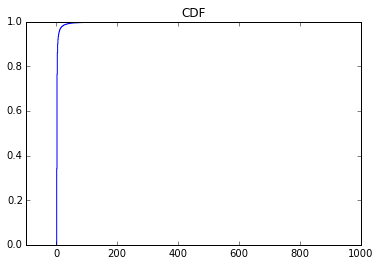

In [65]:
p = 1. * np.arange(len(a)) / (len(a) - 1)
plt.plot(np.sort(a),p, linewidth=1) #CDF
plt.xlim([-100,1000])
plt.title('CDF')
print 'mean node degree = '+str(np.mean(a))
print 'max node degree = '+str(np.max(a))
alpha=1+len(a)/(sum(np.log(np.array(a)/min(np.array(a)))))
print 'alpha = '+str(alpha)
print 'x_min = '+str(min(np.array(a)))
print 'standard deviation (squared) = '+str((np.std(np.array(a)))**2)
#using KS test to find best x_min
from scipy import stats
d=[]
for i in range(np.max(a)):
    xmin=i
    data = [i for i in a if i >=xmin]
    d.append(stats.kstest(data, "powerlaw", args=(xmin,alpha))[0])
cleanedList = [x for x in d if np.isnan(x)==False]
print 'best x_min = '+str(d.index(min(cleanedList)))

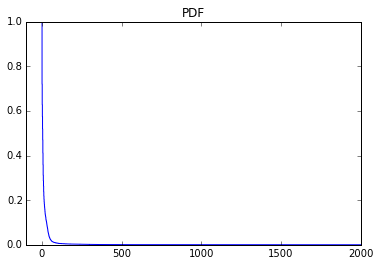

In [59]:
#**********************************Web graph*********************************
import networkx as nx
#loading data
filename = urllib2.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt')
#directed graph
G=nx.read_edgelist(filename,create_using = nx.DiGraph( ))

#calculating in and out degrees
node_in_degree = G.in_degree( )
node_out_degree = G.out_degree( )
in_deg = np.array( node_in_degree.values( ), dtype = np.int )
out_deg = np.array( node_out_degree.values( ), dtype = np.int )
#total degrees
all_degr =np.sort(G.degree().values())[::-1]
#checking if Power Law holds
p = 1. * np.arange(len(all_degr)) / (len(all_degr) - 1)
plt.plot(sorted(all_degr, reverse=True),p, linewidth=1) #PDF
plt.xlim([-100,2000])
plt.title('PDF')

mean node degree (in) = 6.19411012698
max node degree (in) = 20866
mean node degree (out) = 6.19411012698
max node degree (out) = 247
alpha = 1.65256680713
x_min = 1
standard deviation (squared) = 11733.989768
best x_min = 1


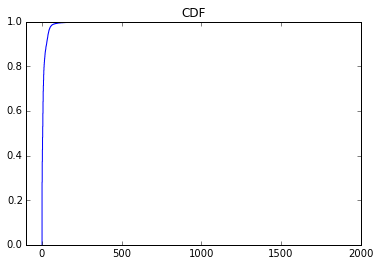

In [60]:
p = 1. * np.arange(len(all_degr)) / (len(all_degr) - 1)
plt.plot(sorted(all_degr),p, linewidth=1) #СDF
plt.xlim([-100,2000])
plt.title('CDF')
print 'mean node degree (in) = '+str(np.mean(in_deg))
print 'max node degree (in) = '+str(np.max(in_deg))
print 'mean node degree (out) = '+str(np.mean(out_deg))
print 'max node degree (out) = '+str(np.max(out_deg))
alpha=1+len(all_degr)/(sum(np.log(all_degr/min(all_degr))))
print 'alpha = '+str(alpha)
print 'x_min = '+str(min(all_degr))
print 'standard deviation (squared) = '+str((np.std(all_degr))**2)
#using KS test to find best x_min
from scipy import stats
d=[]
i=0
while i<len(list(set(all_degr))):
    xmin=list(set(all_degr))[i]
    data = [k for k in all_degr if k >=xmin]
    d.append(stats.kstest(data, "powerlaw", args=(xmin,alpha))[0])
    i=i+1
cleanedList = [x for x in d if np.isnan(x)==False]
print 'best x_min = '+str(list(set(all_degr))[d.index(min(cleanedList))])

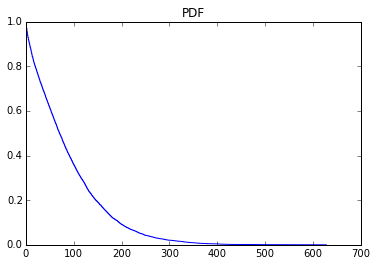

In [62]:
#*****************************Facebook network*****************************
import networkx as nx
#loading data
filename = urllib2.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt')
G=nx.read_edgelist(filename) #undirected graph

#degrees of G's nodes
k = G.degree()
#sorting degrees of nodes in descending order
import operator
k_sorted=sorted(k.items(), key = operator.itemgetter(1), reverse=True)
a=[]#degrees
b=[]#node's ids
for i in range(len(k_sorted)):
    a.append(k_sorted[i][1])
    b.append(int(k_sorted[i][0]))
p = 1. * np.arange(len(a)) / (len(a) - 1)
plt.plot(sorted(a, reverse=True),p, linewidth=1) #PDF
#plt.xlim([-100,000])
plt.title('PDF') 
#doesnt really look like Power Law

mean node degree = 88.938750758
max node degree = 628
alpha = 1.255330766
x_min = 1
standard deviation (squared) = 6169.04385314
best x_min = 1


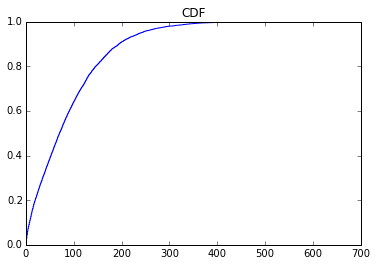

In [63]:
p = 1. * np.arange(len(a)) / (len(a) - 1)
plt.plot(np.sort(a),p, linewidth=1) #CDF
#plt.xlim([-100,1000])
plt.title('CDF')
print 'mean node degree = '+str(np.mean(a))
print 'max node degree = '+str(np.max(a))
alpha=1+len(a)/(sum(np.log(np.array(a)/min(np.array(a)))))
print 'alpha = '+str(alpha)
print 'x_min = '+str(min(np.array(a)))
print 'standard deviation (squared) = '+str((np.std(np.array(a)))**2)
#using KS test to find best x_min
from scipy import stats
d=[]
for i in range(np.max(a)):
    xmin=i
    data = [i for i in a if i >=xmin]
    d.append(stats.kstest(data, "powerlaw", args=(xmin,alpha))[0])
cleanedList = [x for x in d if np.isnan(x)==False]
print 'best x_min = '+str(d.index(min(cleanedList)))